## Segmentação de clientes no Varejo

In [17]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import product
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#checando base de informações de tipo de produto
df = pd.read_csv('c:/csv/dados_clientes.csv')
df.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


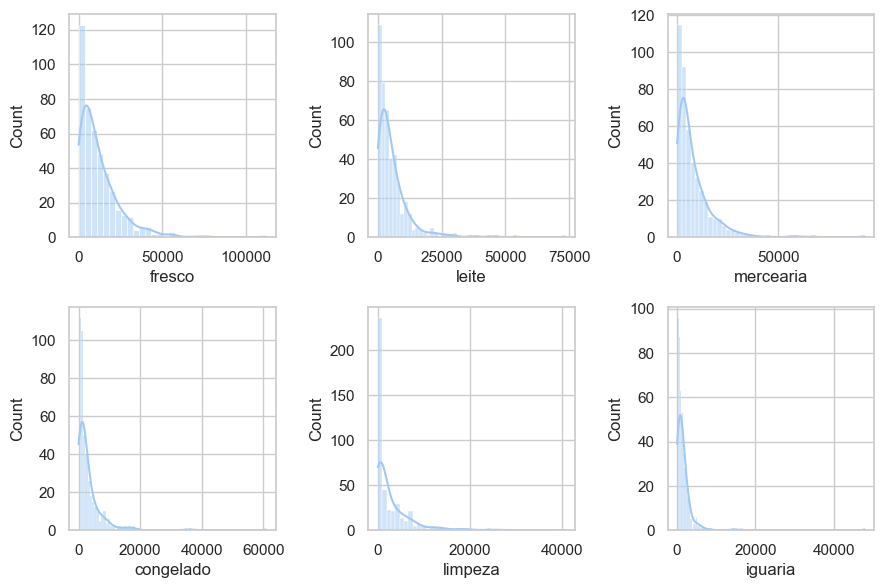

In [5]:
#checando a distribuição das variaveis
fig, axs = plt.subplots(2,3, figsize=(9,6))

pos = list(product(range(2), range(3)))

for i, c in enumerate(df.columns[2:]):
    sns.histplot(data=df, x=c, kde=True, ax=axs[pos[i]])
plt.tight_layout()
plt.show()

#Checando gastos com produtos
#quanto maior o valor menor é a quantidade de gastos com o produto

In [6]:
#Entendendo a base
#checando valores

df.describe()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#após analisar a base é notado um gasto alto em iguaria (47843 em iguarias)
#checando o cliente que gastou esse valor
#ele tem um gasto relativamente alto em todos os produtos exceto limpeza
df[df.iguaria > 2000].sort_values(by=['iguaria'])

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria
300,2,2,16448,6243,6360,824,2662,2005
61,2,3,35942,38369,59598,3254,26701,2017
281,2,3,12238,7108,6235,1093,2328,2079
430,1,3,3097,4230,16483,575,241,2080
9,2,3,6006,11093,18881,1159,7425,2098
...,...,...,...,...,...,...,...,...
181,1,3,112151,29627,18148,16745,4948,8550
87,1,3,43265,5025,8117,6312,1579,14351
71,1,3,18291,1266,21042,5373,4173,14472
23,2,3,26373,36423,22019,5154,4337,16523


In [8]:
#soma de tudo que o cliente gastou no ano
df.iloc[:, 2:].sum(axis=1)

0      34112
1      33266
2      36610
3      27381
4      46100
       ...  
435    73302
436    48372
437    77407
438    17834
439     7589
Length: 440, dtype: int64

In [9]:
#adicionando a soma dentro de um dataframe novo
df_new = df.copy()
df_new['total'] = df.iloc[:, 2:].sum(axis=1)

In [10]:
#checando novo dataframe
df_new.head()

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [11]:
#loop pra pegar cada uma das colunas e dividir pelo valor total e descobrir a porcentagem de gasto do cliente em cima do total
#adiciona os resultados no novo dataframe
for c in df_new.columns[2:8]:
    df_new[f'perc_{c}'] = df_new[c]/df_new['total']

In [12]:
df_new

,canal,regiao,fresco,leite,mercearia,congelado,limpeza,iguaria,total,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
0,2,3,12669,9656,7561,214,2674,1338,34112,0.371394,0.283068,0.221652,0.006273,0.078389,0.039224
1,2,3,7057,9810,9568,1762,3293,1776,33266,0.212139,0.294896,0.287621,0.052967,0.098990,0.053388
2,2,3,6353,8808,7684,2405,3516,7844,36610,0.173532,0.240590,0.209888,0.065692,0.096039,0.214258
3,1,3,13265,1196,4221,6404,507,1788,27381,0.484460,0.043680,0.154158,0.233885,0.018516,0.065301
4,2,3,22615,5410,7198,3915,1777,5185,46100,0.490564,0.117354,0.156139,0.084924,0.038547,0.112473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302,0.405214,0.164402,0.218643,0.179190,0.002483,0.030067
436,1,3,39228,1431,764,4510,93,2346,48372,0.810965,0.029583,0.015794,0.093236,0.001923,0.048499
437,2,3,14531,15488,30243,437,14841,1867,77407,0.187722,0.200085,0.390701,0.005645,0.191727,0.024119
438,1,3,10290,1981,2232,1038,168,2125,17834,0.576988,0.111080,0.125154,0.058203,0.009420,0.119154


In [13]:
#pegando colunas só com informações percentuais
df_rel = df_new.iloc[:, -6:]

In [14]:
#iniciando modelagem
from sklearn.cluster import KMeans

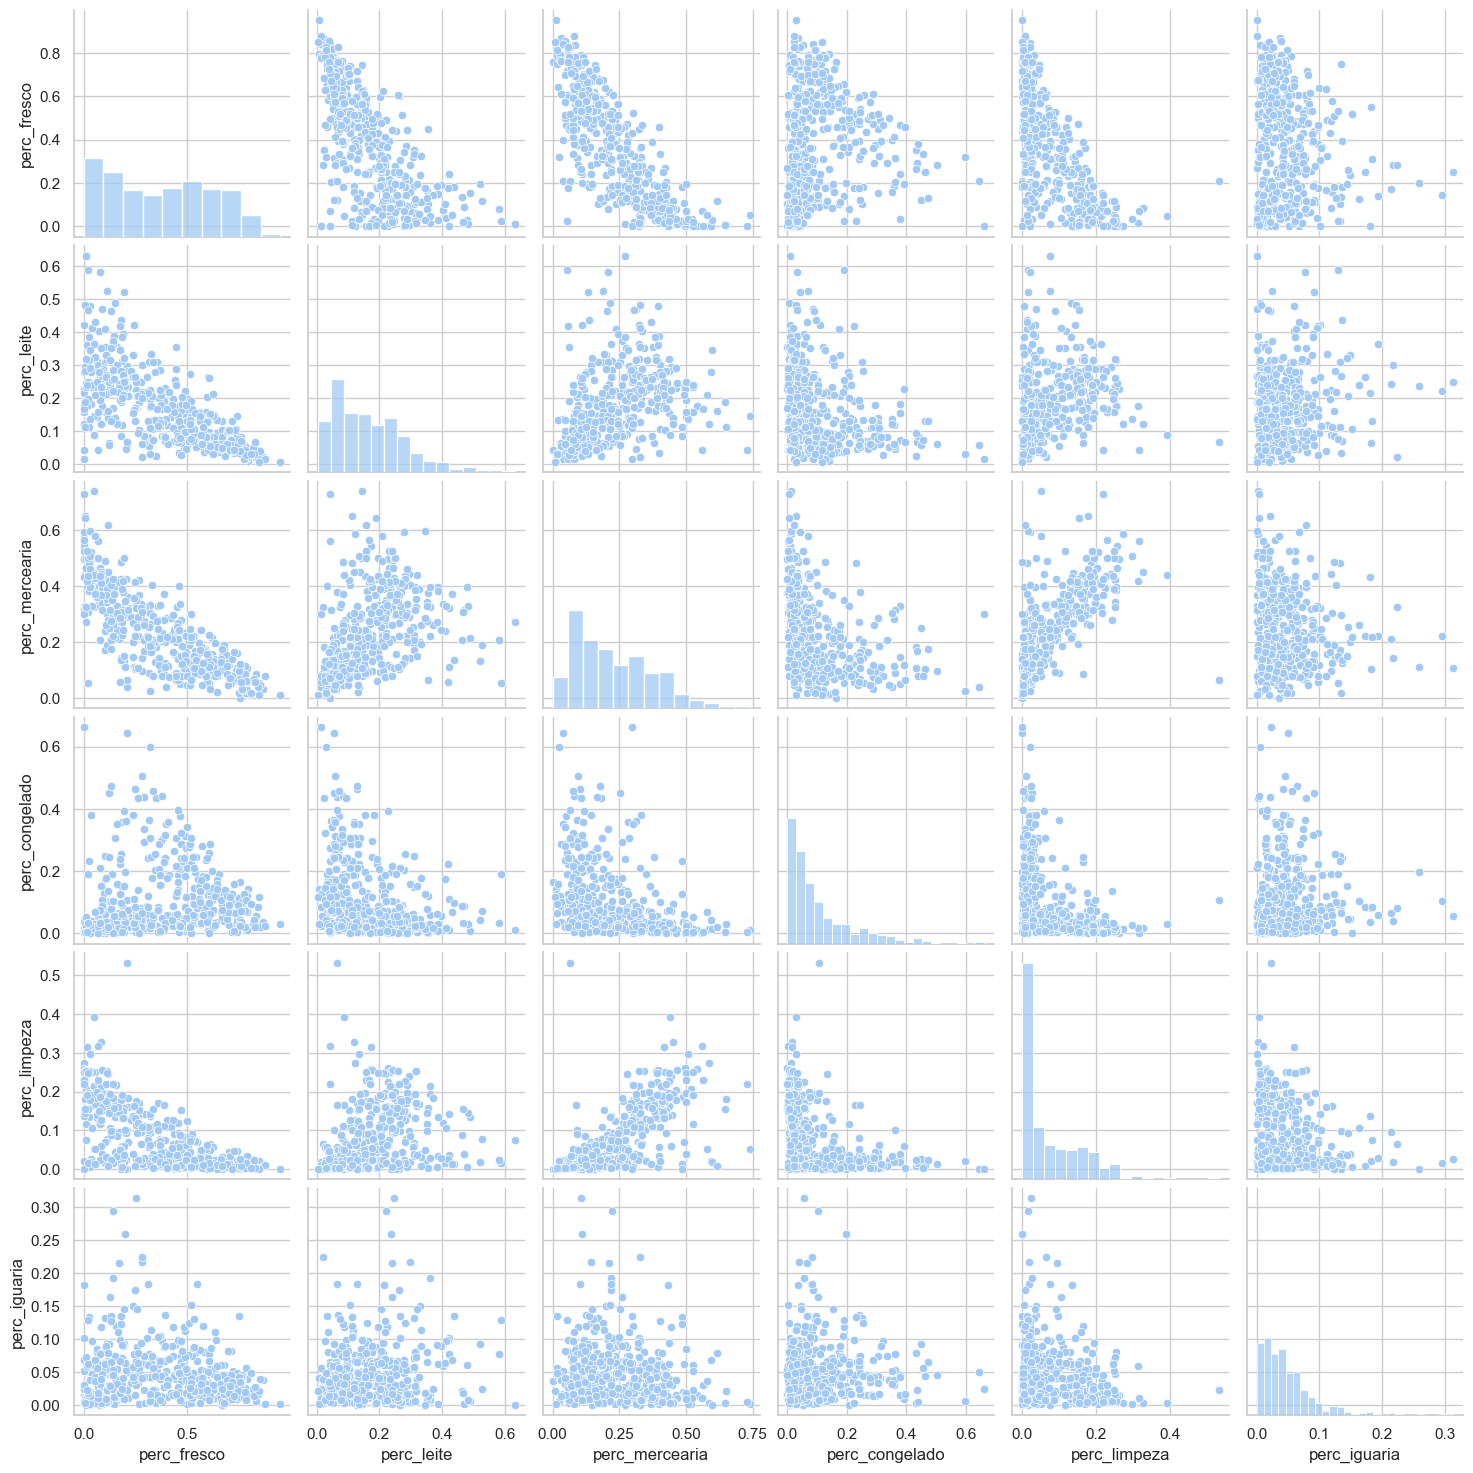

In [18]:
#checando a distribuição de dados
sns.pairplot(df_rel);

In [19]:
#rodando k-means com 3 grupos
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

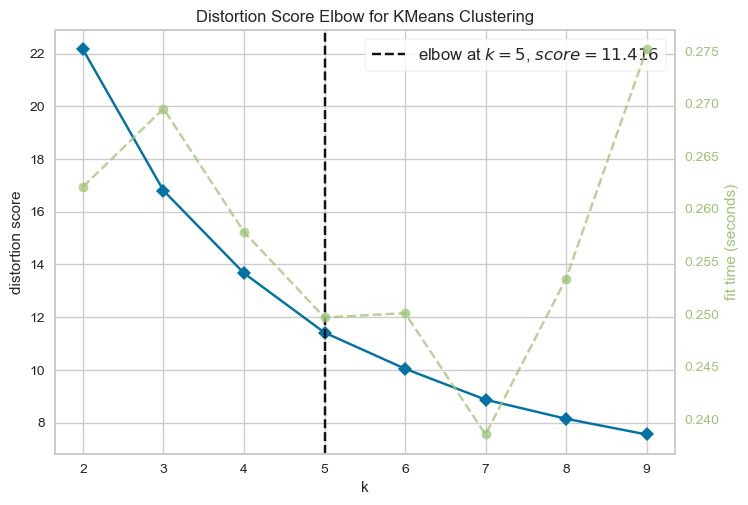

In [20]:
#checando valor ideal de k
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(df_rel) 
visualizer.show(); 

#l ideal = 5

In [21]:
#checando grupos
kmeans = KMeans(n_clusters=5, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

In [23]:
df_rel['cluster'] = labels

In [24]:
#grupo 0 gasta quase 70% com alimentos frescos
#grupo 1 tem um alto gasto em leite, mercearia e limpeza
#grupo 2 frescos, mercearia e congelado
#grupo 3 fresco, leite e mercearia
#grupo 4 fresco, leite, mercearia também mas com um gasto bem superior em frescos comparado ao grupo 3 e inferior a mercearia
df_rel.groupby('cluster').mean()

,perc_fresco,perc_leite,perc_mercearia,perc_congelado,perc_limpeza,perc_iguaria
cluster,,,,,,
0,0.695304,0.068209,0.090417,0.095122,0.015603,0.035345
1,0.081115,0.221478,0.445534,0.034944,0.181795,0.035133
2,0.374955,0.102833,0.132356,0.318957,0.024028,0.046871
3,0.180943,0.311129,0.260227,0.081023,0.089844,0.076834
4,0.467870,0.146105,0.221307,0.058423,0.056012,0.050283


In [25]:
from sklearn.decomposition import PCA

In [26]:
# visualização 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_rel)

#o resultado mostra que é possive chegar no resultado final só utilizando o primeiro componente
print(pca.explained_variance_ratio_)

[0.9520818  0.03492302]


In [27]:
k=5
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto").fit(df_rel)
labels = kmeans.labels_

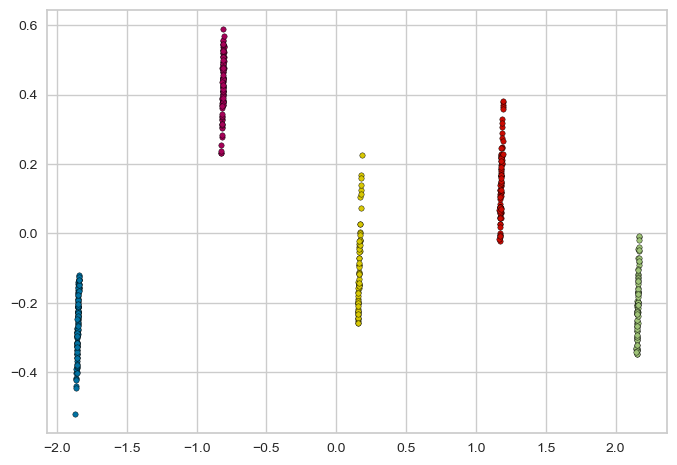

In [28]:
# Dados Reais
# plotando o grafico com o resultado do PCA
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();
#é observado que realmente há 5 grupos bem separados